주어진 문제
1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요?
2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [283]:
df = pd.read_csv('Jobis_3o3.csv')
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


# 데이터 탐색

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [285]:
df.describe()

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


In [286]:
df['year'].value_counts()

2020    23782
2019    20842
2018    19983
2017    17495
2016    13913
2015     3985
Name: year, dtype: int64

In [287]:
df.sort_values(by='age')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
15685,15.0,F,2016,5000.0,400.0,True,NaN,32000.0,NaN
92509,16.0,M,2020,4000.0,400.0,False,NaN,26000.0,NaN
36983,16.0,M,2020,21000.0,400.0,True,NaN,127000.0,NaN
59884,16.0,M,2020,28000.0,400.0,True,NaN,170000.0,NaN
19722,16.0,F,2018,8000.0,400.0,False,NaN,51000.0,NaN
...,...,...,...,...,...,...,...,...,...
31654,78.0,M,2018,229000.0,8500.0,True,NaN,1377000.0,NaN
18809,79.0,M,2019,32000.0,400.0,True,957000.0,191000.0,NaN
91695,81.0,F,2019,85000.0,4300.0,True,NaN,510000.0,NaN
58645,81.0,F,2017,56000.0,400.0,True,NaN,340000.0,NaN


In [288]:
# 수수료를 지불한 사람은 1, 그렇지 않은 사람은 0
df['has_paid'] = df['has_paid'].apply(lambda x: 1 if x else 0)

In [289]:
df['has_paid'].value_counts()

1    64643
0    35357
Name: has_paid, dtype: int64

In [290]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,0,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,0,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,NaN


In [291]:
# 결측값을 0으로 변환
df.fillna(0, inplace=True)

In [292]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,0,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,0,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,0.0


## 칼럼별로 살펴보기 (문자형)

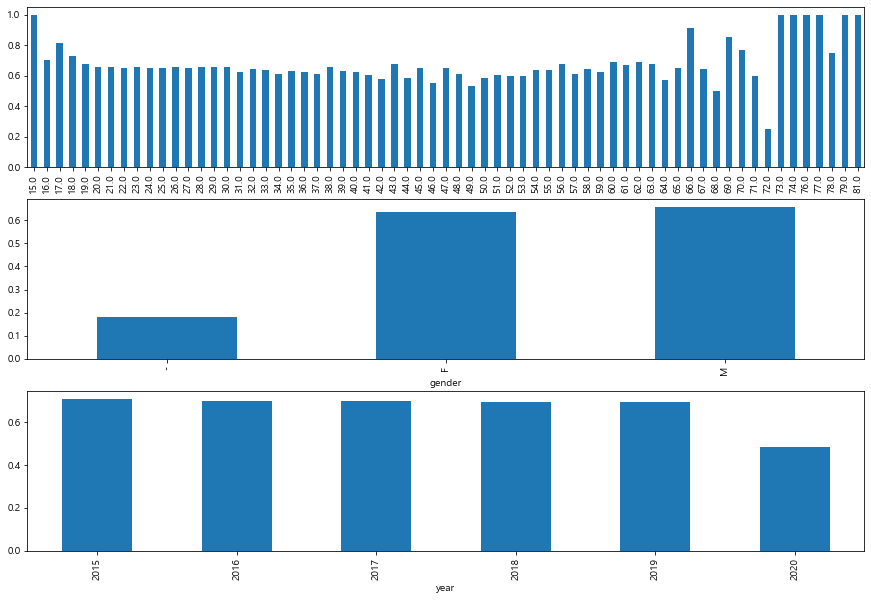

In [293]:
plt.figure(figsize=(15,10))
plt.subplot(311)
df.groupby('age')['has_paid'].mean().sort_index().plot(kind='bar')
plt.subplot(312)
df.groupby('gender')['has_paid'].mean().sort_values().plot(kind='bar')
plt.subplot(313)
df.groupby('year')['has_paid'].mean().sort_index().plot(kind='bar')
plt.show()

- 72세가 유독 환급을 받지 않음.-> 몇 명이나 있는지?
- 성별에 결측치가 있음 -> 어떻게 판단할 것인가?
- 2020년에 발생한 수익에 대한 세금을 유독 환급 받지 않음

In [294]:
# 70대는 몇명?
df[df['age']>=70]['age'].value_counts()

70.0    13
76.0     7
74.0     5
71.0     5
78.0     4
72.0     4
81.0     3
77.0     2
73.0     1
79.0     1
Name: age, dtype: int64

In [295]:
df['gender'].value_counts()

M    50477
F    49501
-       22
Name: gender, dtype: int64

- 성별 결측치 22개를 어떻게 판단할 것인가?
1. 나머지 99978개의 data를 이용해서 남성인지 여성인지 predict한 값으로 대체하기
2. 22개 정도는 drop

## 칼럼별로 살펴보기 (숫자형)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='income_기타', ylabel='Density'>

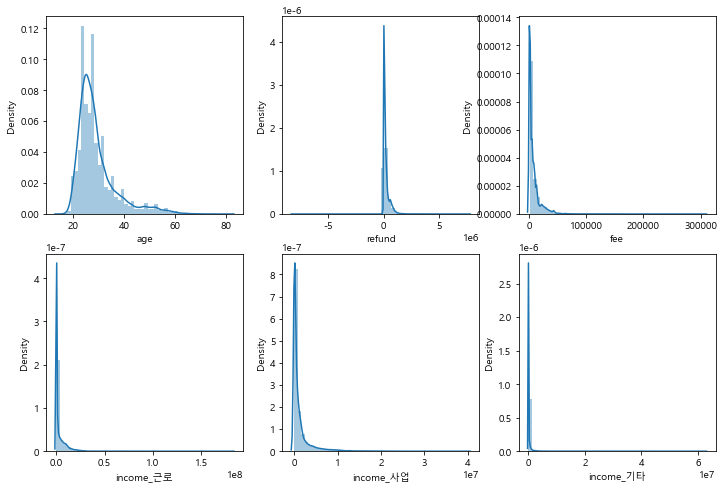

In [296]:
plt.figure(figsize=(12,8))
plt.subplot(231)
sns.distplot(df['age'])
plt.subplot(232)
sns.distplot(df['refund'])
plt.subplot(233)
sns.distplot(df['fee'])
plt.subplot(234)
sns.distplot(df['income_근로'])
plt.subplot(235)
sns.distplot(df['income_사업'])
plt.subplot(236)
sns.distplot(df['income_기타'])

In [297]:
df.sort_values(by='refund').head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
98352,33.0,M,2018,-8265000.0,4300.0,1,0.0,690000.0,0.0
52858,34.0,M,2017,-2328000.0,400.0,0,16759000.0,28000.0,441000.0
55168,28.0,F,2020,-1658000.0,1700.0,0,10509000.0,570000.0,0.0
54256,48.0,F,2018,-948000.0,3000.0,1,8157000.0,3975000.0,0.0
94281,39.0,F,2020,-683000.0,39100.0,0,6082000.0,10649000.0,0.0


In [298]:
df[df['refund']<=0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
1857,26.0,F,2019,-0.0,12800.0,0,0.0,0.0,0.0
2642,26.0,M,2015,-0.0,4300.0,0,0.0,0.0,0.0
2674,22.0,F,2019,-0.0,5100.0,1,0.0,0.0,349000.0
5131,25.0,F,2015,-0.0,4300.0,1,0.0,0.0,0.0
5253,31.0,M,2015,-0.0,400.0,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
97757,32.0,M,2015,-0.0,4300.0,0,0.0,0.0,0.0
98352,33.0,M,2018,-8265000.0,4300.0,1,0.0,690000.0,0.0
98408,26.0,M,2015,-0.0,8500.0,0,0.0,0.0,0.0
98731,28.0,M,2015,-0.0,12800.0,0,0.0,0.0,0.0


- 예상 환급액이 마이너스인 경우는 뭘까?
- refund가 음수인 경우 제거할지, 아니면 시스템 오류로 +인데 -로 잘못 표기되지는 않았을지
- data가 skewed된 경우가 많으므로 변환할 필요가 있음
1) 표준화
2) 정규화
3) 로그변환

## 각 칼럼들의 상관관계

In [299]:
df.corr()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.113500,0.078485,0.072135,-0.022918,0.217894,0.069412,0.054130
year,-0.113500,1.000000,0.140977,0.169537,-0.136060,0.124501,0.153693,0.036665
refund,0.078485,0.140977,1.000000,0.969427,-0.094061,-0.079797,0.610592,0.507695
fee,0.072135,0.169537,0.969427,1.000000,-0.117695,-0.079523,0.601112,0.531414
has_paid,-0.022918,-0.136060,-0.094061,-0.117695,1.000000,0.048247,-0.014917,-0.044802
income_근로,0.217894,0.124501,-0.079797,-0.079523,0.048247,1.000000,-0.086807,0.098044
income_사업,0.069412,0.153693,0.610592,0.601112,-0.014917,-0.086807,1.000000,-0.049067
income_기타,0.054130,0.036665,0.507695,0.531414,-0.044802,0.098044,-0.049067,1.000000


<AxesSubplot:>

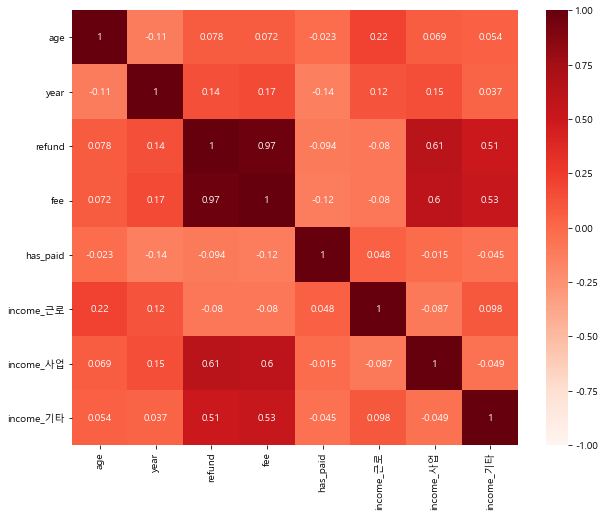

In [300]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(), annot=True, cmap='Reds',vmin=-1,vmax=1)

- refund(예상환금액)과 상관관계가 있는 요소: fee(수수료), 사업소득, 기타소득
- has_paid(수수료 결제여부)와 그나마 상관관계가 있는 요소: year, fee

<AxesSubplot:xlabel='fee', ylabel='refund'>

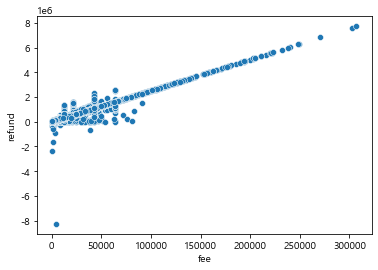

In [158]:
sns.scatterplot(data=df, x='fee', y='refund')

<AxesSubplot:xlabel='fee', ylabel='refund'>

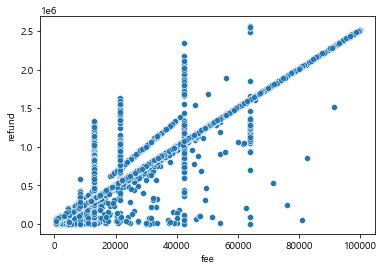

In [159]:
sns.scatterplot(data=df[(df['fee']<=100000) & (df['refund']>=-1)], x='fee', y='refund')

# 데이터 전처리
<탐색 결과 정리>
### 1. 성별 결측치 22개를 어떻게 판단할 것인가?
1. 나머지 99978개의 data를 이용해서 남성인지 여성인지 predict한 값으로 대체하기
2. 22개 정도는 drop
3. 성별이 결제 여부에 중요할까?

### 2. 예상 환급액이 0원이하인 경우는 뭘까?
- 뱉어내야하는 돈이라고 봐야하나?
- 예상환급액이 0원이하인데 수수료를 지급한 사람은 이유가 있나?
1. 76개 제거
2. 0원 이하임에도 수수료를 지불한 경우가 있으므로 살리기

### 3. data가 skewed된 경우: (refund), fee, 근로소득, 사업소득, 기타소득
1. 표준화
2. 정규화
3. **로그변환**

### 4. 데이터 결합
1. refund와 fee를 이용해 하나의 칼럼 만들기 ex. fee/refund, refund-fee
2. 나이 segment를 어떤 기준으로 나눌 것인가
- 먼저 단순히 연령대로 나눈다. ex) 20-23세는 20대초반, 24-26세는 20대 중반 ... 30대까지만.
- 40대부터는 나이가 초반이냐 중반이냐 후반이냐의 의미가 퇴색될 것으로 생각함. 40대는 40대로, 50대는 50대로...
- 나눈 나이대별로 나의 소득의 합으로 등급을 나눠 어디에 해당하는지 칼럼 추가 [A등급_B등급_C등급]

### 5. 근로소득, 사업소득, 기타소득을 하나의 칼럼으로 만들어야 하는가?
1. 세금이 어떤 과정으로 부과되고, 환급되는 것인지 도메인 지식이 필요

### 6. 이상치 제거
1. IQR을 활용, 이상치 인덱스 제거 (fee/refund 칼럼)

# 분석 순서

<주어진 문제>
1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? -> 최대한 전처리하여 과적합을 줄인다.
2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요? -> 최대한 segment를 나눠보며 action plan을 제시한다.

먼저 세그먼트를 최대한 나누고, 2번 질문의 답에 대해 답 찾기.

이후 이상치 제거, 로그변환 등 전처리하여 모델 만들고 1번 문제에 대해 답 찾기.

In [212]:
# 예상환급액-수수료가 0원 이하인데 수수료를 지불한 사람들 확인
df['예상환급액-수수료'] = df['refund'] - df['fee']

In [217]:
df[(df['예상환급액-수수료']<=0) & (df['has_paid']==1)]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액-수수료
1765,20.0,F,2019,4000.0,8900.0,1,0.0,26000.0,169000.0,-4900.0
2674,22.0,F,2019,-0.0,5100.0,1,0.0,0.0,349000.0,-5100.0
5131,25.0,F,2015,-0.0,4300.0,1,0.0,0.0,0.0,-4300.0
5253,31.0,M,2015,-0.0,400.0,1,0.0,0.0,0.0,-400.0
5809,51.0,M,2017,3000.0,8500.0,1,23645000.0,1553000.0,264000.0,-5500.0
...,...,...,...,...,...,...,...,...,...,...
90522,30.0,F,2019,8000.0,11100.0,1,8208000.0,51000.0,255000.0,-3100.0
90988,26.0,M,2019,10000.0,12800.0,1,0.0,0.0,0.0,-2800.0
92723,50.0,F,2016,6000.0,6800.0,1,0.0,1059000.0,0.0,-800.0
96795,31.0,F,2015,-0.0,12800.0,1,0.0,0.0,0.0,-12800.0


### 해당 연도 소득 기준으로는 수수료가 예상환급액보다 많지만, 다른 연도와 합쳐서 환급받을 때는 +가 되는 경우가 있을 수 있음
그런데 아무리 그래도 소득의 합이 0인데 어떻게 예상 환급 급액이 있을 수 있지?

- 그룹을 셋으로 나누자. 
1. 예상환급액이 수수료보다 큰 그룹
2. 예상환급액이 수수료보다 적은데 수수료를 결제한 사람들의 그룹
3. 예상환급액이 수수료보다 적거나 같아서, 지불을 하지 않은 그룹

그리고 특성을 파악해보자

In [218]:
# 예상환급액 대비 수수료 칼럼 추가
df['예상환급액_대비_수수료(%)'] = df['fee'] / df['refund'] * 100

In [219]:
# 소득 합계 칼럼 추가
df['income_합계'] = df['income_근로'] + df['income_사업'] + df['income_기타']

In [220]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액-수수료,예상환급액_대비_수수료(%),income_합계
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,4600.0,8.000000,10062000.0
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,98300.0,1.700000,19907000.0
2,28.0,F,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,277500.0,3.979239,1461000.0
3,27.0,M,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,393800.0,3.951220,2471000.0
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,0.0,109700.0,3.771930,689000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,1,0.0,0.0,680000.0,289100.0,3.953488,680000.0
99996,62.0,F,2019,77000.0,1300.0,1,0.0,463000.0,0.0,75700.0,1.688312,463000.0
99997,24.0,M,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,8600.0,4.444444,7977000.0
99998,24.0,M,2019,34000.0,400.0,1,0.0,204000.0,0.0,33600.0,1.176471,204000.0


In [232]:
group1 = df[df['예상환급액-수수료']>0] # 보통의 경우
group2 = df[(df['예상환급액-수수료']<=0) & (df['has_paid']==1)] # 적자 혹은 수익이 없는데도 수수료를 결제한 경우 
group3 = df[(df['예상환급액-수수료']<=0) & (df['has_paid']==0)] # 적자 혹은 수익이 없기 때문에 수수료를 미결제한 경우

## 연령대별 income_합계 시각화

<AxesSubplot:xlabel='age', ylabel='income_합계'>

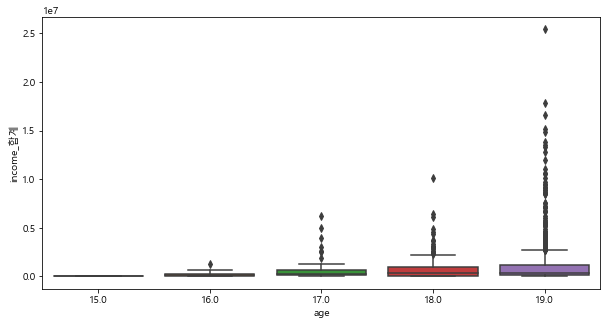

In [236]:
# 10대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[group1['age']<20], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

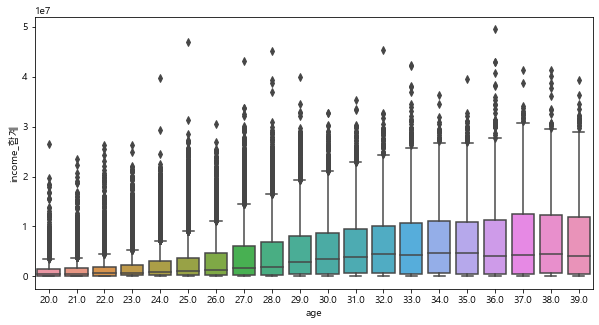

In [237]:
# 20대~30대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[(group1['age'] >= 20) & (group1['age']<40)], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

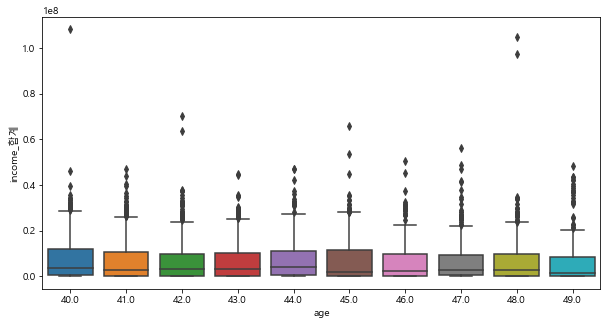

In [167]:
# 40대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[(group1['age'] >= 40) & (group1['age']<50)], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

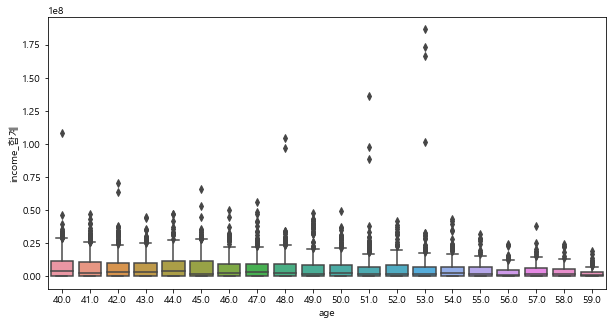

In [238]:
# 40대~50대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[(group1['age'] >= 40) & (group1['age']<60)], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

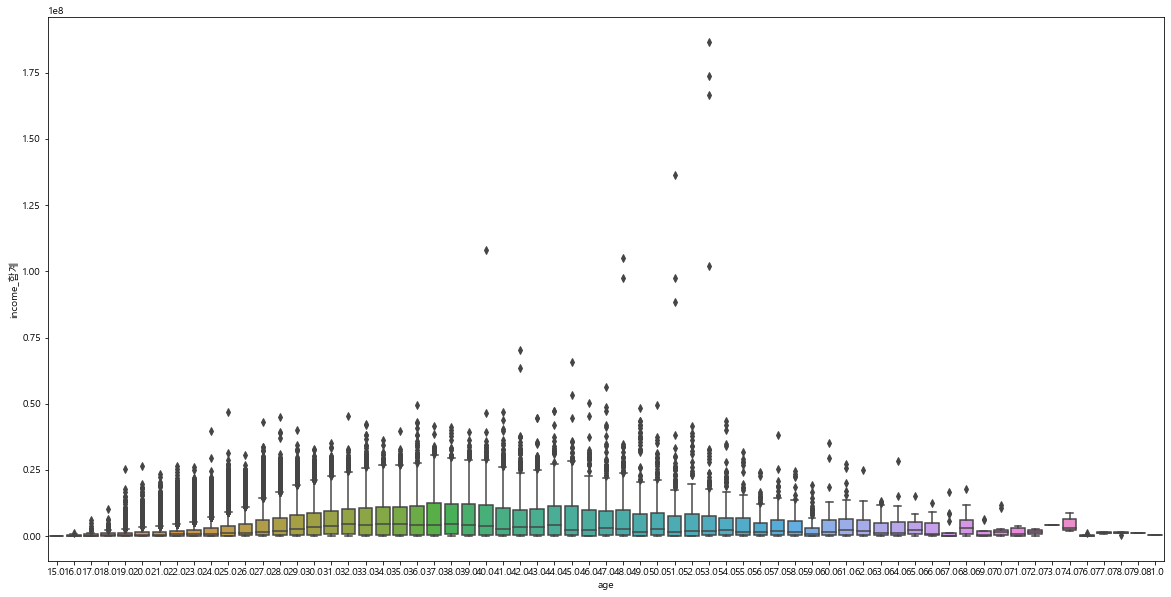

In [239]:
# 전체
plt.figure(figsize=(20,10))
sns.boxplot(data = group1, x ='age',y='income_합계')

In [240]:
def age_category(age):
    category =''
    if age < 20:
        category = '10대'
    elif 20 <= age <= 23:
        category = '20대초반'
    elif 24 <= age <= 26:
        category = '20대중반'
    elif 27 <= age <= 29:
        category = '20대후반'
    elif 30 <= age <= 33:
        category = '30대초반'
    elif 34 <= age <= 36:
        category = '30대중반'
    elif 37 <= age <= 39:
        category = '30대후반'
    elif age < 50:
        category = '40대'
    elif age < 60:
        category = '50대'
    elif age < 70:
        category = '60대'
    else:
        category = '70대이상'
    return category

In [241]:
group1['연령대'] = group1['age'].apply(age_category)

<ipython-input-241-6f8f8f33bf2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['연령대'] = group1['age'].apply(age_category)


In [244]:
group1.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액-수수료,예상환급액_대비_수수료(%),income_합계,연령대
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,4600.0,8.000000,10062000.0,20대후반
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,98300.0,1.700000,19907000.0,30대중반
2,28.0,F,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,277500.0,3.979239,1461000.0,20대후반
3,27.0,M,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,393800.0,3.951220,2471000.0,20대후반
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,0.0,109700.0,3.771930,689000.0,20대중반


<AxesSubplot:xlabel='연령대'>

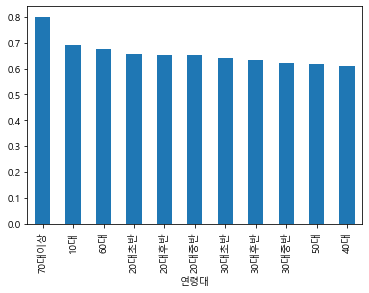

In [245]:
# 연령대별 환급
group1.groupby('연령대')['has_paid'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='연령대,gender'>

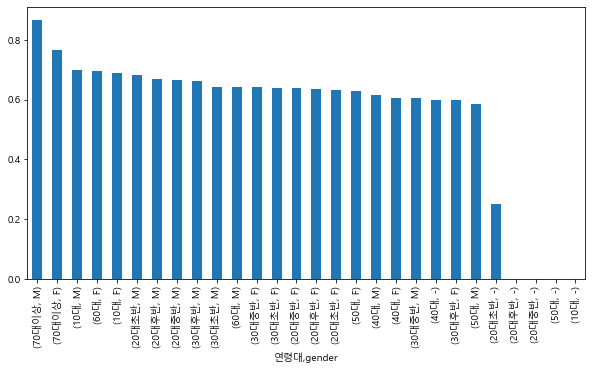

In [310]:
# 연령대별, 성별별 환급
plt.figure(figsize=(10,5))
group1.groupby(['연령대','gender'])['has_paid'].mean().sort_values(ascending=False).plot(kind='bar')

In [246]:
group1['예상환급액_대비_수수료(%)'].sort_values()

70155     0.563380
18917     0.563380
62406     0.563380
28089     0.563380
63367     0.563380
           ...    
81476    90.000000
53570    92.222222
41047    94.444444
74187    96.800000
45219    98.000000
Name: 예상환급액_대비_수수료(%), Length: 99870, dtype: float64

<AxesSubplot:xlabel='예상환급액_대비_수수료(%)', ylabel='has_paid'>

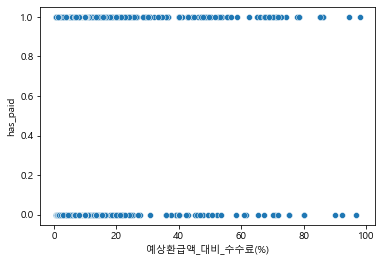

In [248]:
sns.scatterplot(data=group1, x='예상환급액_대비_수수료(%)',y='has_paid')

<AxesSubplot:xlabel='has_paid', ylabel='예상환급액_대비_수수료(%)'>

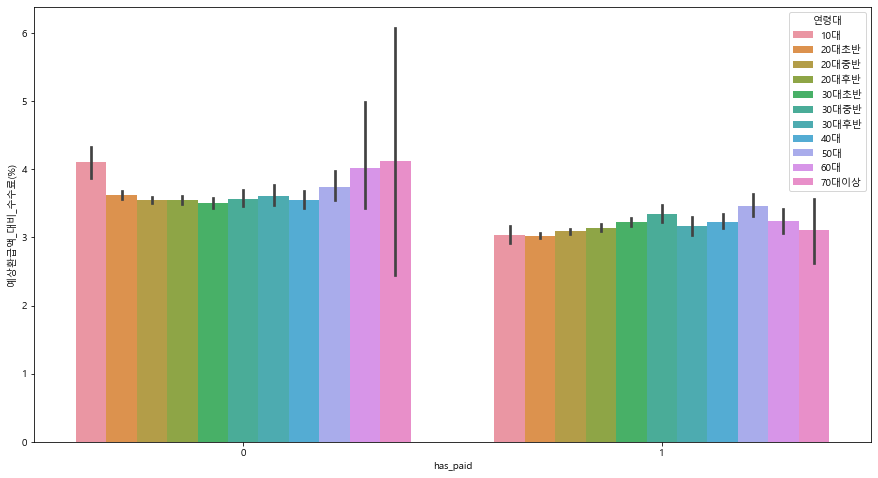

In [269]:
plt.figure(figsize=(15,8))
sns.barplot(data=group1, x='has_paid',y='예상환급액_대비_수수료(%)',
            hue='연령대',hue_order=['10대','20대초반','20대중반','20대후반','30대초반','30대중반','30대후반','40대',
                                '50대','60대','70대이상'])

- 예상환급액 대비 수수료가 낮을수록 수수료를 결제함 (당연한 결과)
- 10대,60대,70대는 다른 연령대 대비 지불여부의 차이가 다소 있음

<AxesSubplot:xlabel='has_paid', ylabel='예상환급액_대비_수수료(%)'>

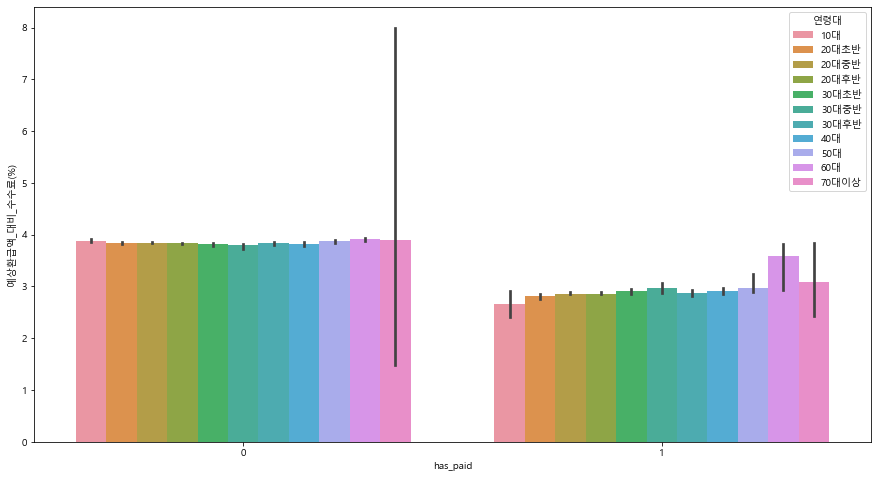

In [304]:
# 중앙값
plt.figure(figsize=(15,8))
sns.barplot(data=group1, x='has_paid',y='예상환급액_대비_수수료(%)',estimator=np.median,
            hue='연령대',hue_order=['10대','20대초반','20대중반','20대후반','30대초반','30대중반','30대후반','40대',
                                '50대','60대','70대이상'])

<AxesSubplot:xlabel='has_paid', ylabel='예상환급액-수수료'>

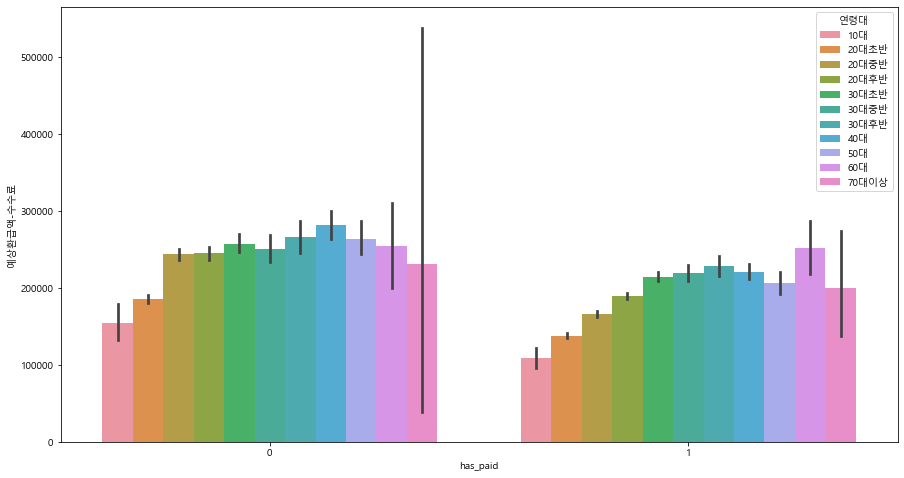

In [305]:
plt.figure(figsize=(15,8))
sns.barplot(data=group1, x='has_paid',y='예상환급액-수수료',
            hue='연령대',hue_order=['10대','20대초반','20대중반','20대후반','30대초반','30대중반','30대후반','40대',
                                '50대','60대','70대이상'])

<AxesSubplot:xlabel='has_paid', ylabel='예상환급액-수수료'>

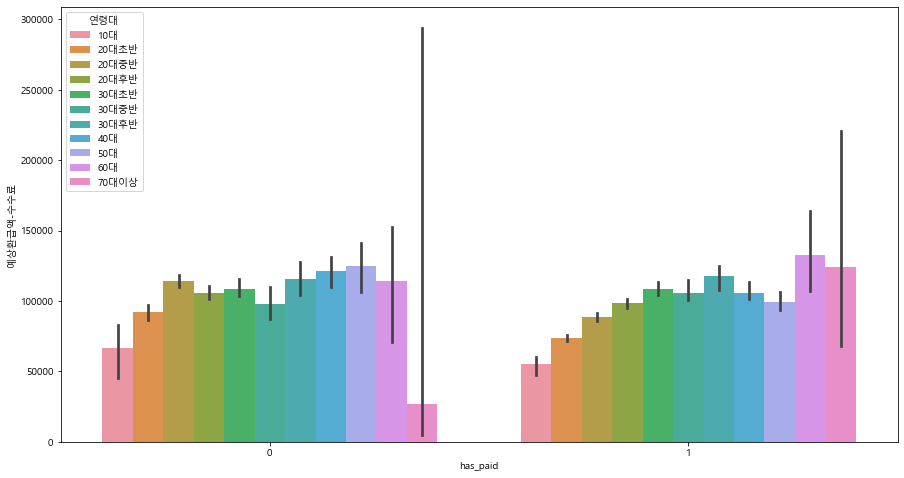

In [307]:
plt.figure(figsize=(15,8))
sns.barplot(data=group1, x='has_paid',y='예상환급액-수수료', estimator=np.median,
            hue='연령대',hue_order=['10대','20대초반','20대중반','20대후반','30대초반','30대중반','30대후반','40대',
                                '50대','60대','70대이상'])

- 대부부의 연령대에서 수수료를 지불한 사람들의 [예상환급금액-수수료]의 금액이 더 적음
- 지급받을 금액이 적음에도 불구하고 이런 차이를 보인 이유가 있나?
- has_paid = 1인 사람들의 특성을 분석해봐야함

<AxesSubplot:>

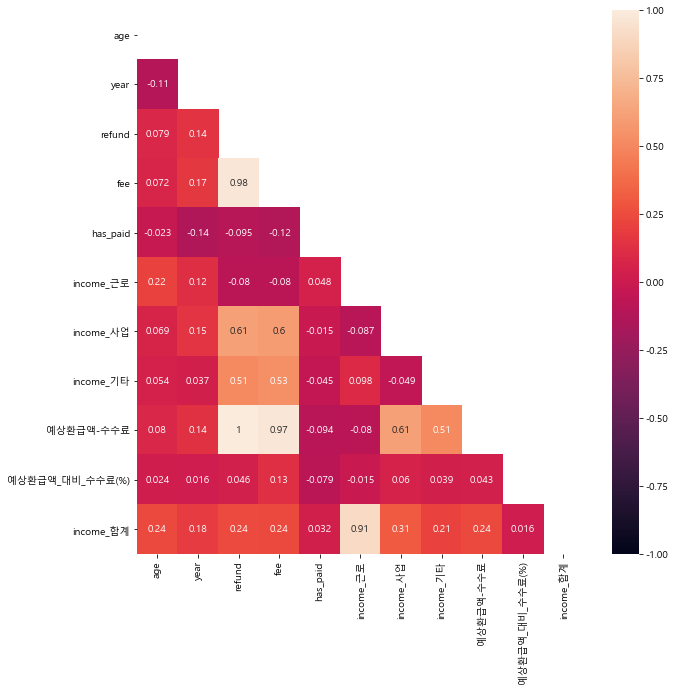

In [311]:
mask = np.triu(np.ones_like(group1.corr(), dtype=np.bool))
plt.figure(figsize=(10,10))
sns.heatmap(data = group1.corr(),
            annot=True,
           mask=mask,
           vmin=-1,
           vmax=1)

# 팀플 방향
## 1. 질문1을 푸는 그룹
(고객의 결제여부에 영향을 미치는 요인들은 무엇인가요?)
### 결제 여부를 예측하는 머신러닝 모델을 만들고 feature_importance별로 영향을 미치는 요인(칼럼) 순위별로 제시


## 2. 질문2를 푸는 그룹
(고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?)


### 질문2를 푸는 그룹에서 각 segment별로 자기 분량을 나눠서 책임지고 분석

#### 연령대별, 성별별로 몇 그룹씩 묶어서 분석하기
- 10대 남성
- 10대 여성

- 20대초반 남성
- 20대초반 여성
- 20대중반 남성
- 20대중반 여성
- 20대후반 남성
- 20대후반 여성

- 30대초반 남성
- 30대초반 여성
- 30대중반 남성
- 30대중반 여성
- 30대후반 남성
- 30대후반 여성

- 40대 남성
- 40대 여성

- 50대 남성
- 50대 여성

- 60대 남성
- 60대 여성

- 70대이상 남성
- 70대이상 여성

#### 그룹2 담당자들이 제안해야하는 문구 예시
예를 들어, 내가 30대를 맡기로 한 담당자라면
- 30대초반 남성:
        예상환급액-수수료가 10,000원 이상인 사람의 결제율이 그렇지 않은 사람보다 더 높으므로, 예상환급액-수수료가 10,000원 이하의 사람들을 대상으로 수수료를 다소 인하하여 10,000원 이상을 만들어 결제를 유도한다.
- 30대후반 여성:
        전체 소득 대비 사업소득의 비율이 30% 이상인 경우 그렇지 않은 사람들보다 결제율이 높으므로 그들에게 결제를 유도하는 push 메시지를 보낸다.